In [5]:
import pandas as pd
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np



In [6]:

# Load the data 
data = pd.read_csv('Data/colon-dataset-processed.csv')
data.head()

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False


In [7]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separate the two classes in the training data
diagnosed = X_train[y_train == 'diagnosed']
healthy = X_train[y_train == 'healthy']

# Under-sample the 'diagnosed' class to match the number of 'healthy' samples
diagnosed_undersampled = resample(diagnosed, replace=False, n_samples=len(healthy), random_state=42)

# Combine the undersampled 'diagnosed' class with the 'healthy' class
X_train_undersampled = pd.concat([diagnosed_undersampled, healthy])
y_train_undersampled = ['diagnosed'] * len(diagnosed_undersampled) + ['healthy'] * len(healthy)

# Train SVM
svm = SVC(C=1, kernel='linear', gamma='scale')
svm.fit(X_train_undersampled, y_train_undersampled)

# Evaluate
y_pred_undersampled = svm.predict(X_test)
classification_results_undersampled = classification_report(y_test, y_pred_undersampled)

print(classification_results_undersampled)



              precision    recall  f1-score   support

   diagnosed       1.00      0.81      0.90        16
     healthy       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.92      0.90      0.90        29



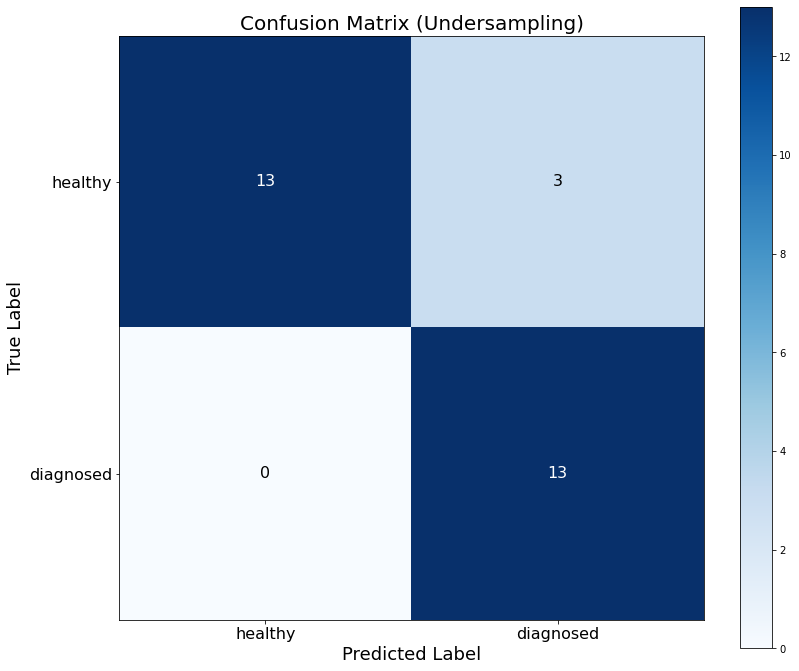

In [8]:
# Enhanced confusion matrix plotting for undersampled SVM results
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_undersampled)

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the x and y ticks, labels, and title with increased font size
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix (Undersampling)",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()
